## Objetivo
¿ Cuáles son las tiendas que han tenido un mayor número de ventas históricamente y cómo ha sido su evolución a lo largo del tiempo ?

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0.0
4,4,2013-01-01,1,BOOKS,0.000,0.0
...,...,...,...,...,...,...
2158658,2158658,2016-04-29,27,PREPARED FOODS,111.694,1.0
2158659,2158659,2016-04-29,27,PRODUCE,2395.465,0.0
2158660,2158660,2016-04-29,27,SCHOOL AND OFFICE SUPPLIES,2.000,0.0
2158661,2158661,2016-04-29,27,SEAFOOD,27.728,5.0


In [8]:
df_por_tienda = df.groupby('store_nbr').agg({ #Sacar numero de ventas de cada tienda
    'sales':'sum'
    })
df_por_tienda

,sales
store_nbr,
1,9.169735e+06
2,1.408323e+07
3,3.259099e+07
4,1.244171e+07
5,1.085585e+07
6,1.651690e+07
7,1.716661e+07
8,1.970458e+07
9,1.748563e+07


In [13]:
#Sacar el top 3 de tiendas con mas ventas

# Ordenar de mayor a menor por la columna 'sales'
df_por_tienda = df_por_tienda.sort_values(by='sales', ascending=False)

# Extraer el top 3
top_3_tiendas = df_por_tienda.head(3).index

top_3_tiendas

Index([44, 45, 47], dtype='int64', name='store_nbr')

In [14]:
# Filtrar el DataFrame original para incluir solo las tiendas top 3
df_top_3 = df[df['store_nbr'].isin(top_3_tiendas)]
df_top_3

,id,date,store_nbr,family,sales,onpromotion
1254,1254,2013-01-01,44,AUTOMOTIVE,0.000,0.0
1255,1255,2013-01-01,44,BABY CARE,0.000,0.0
1256,1256,2013-01-01,44,BEAUTY,0.000,0.0
1257,1257,2013-01-01,44,BEVERAGES,0.000,0.0
1258,1258,2013-01-01,44,BOOKS,0.000,0.0
...,...,...,...,...,...,...
2157601,2157601,2016-04-28,47,POULTRY,628.328,1.0
2157602,2157602,2016-04-28,47,PREPARED FOODS,191.124,0.0
2157603,2157603,2016-04-28,47,PRODUCE,3653.998,1.0
2157604,2157604,2016-04-28,47,SCHOOL AND OFFICE SUPPLIES,4.000,0.0


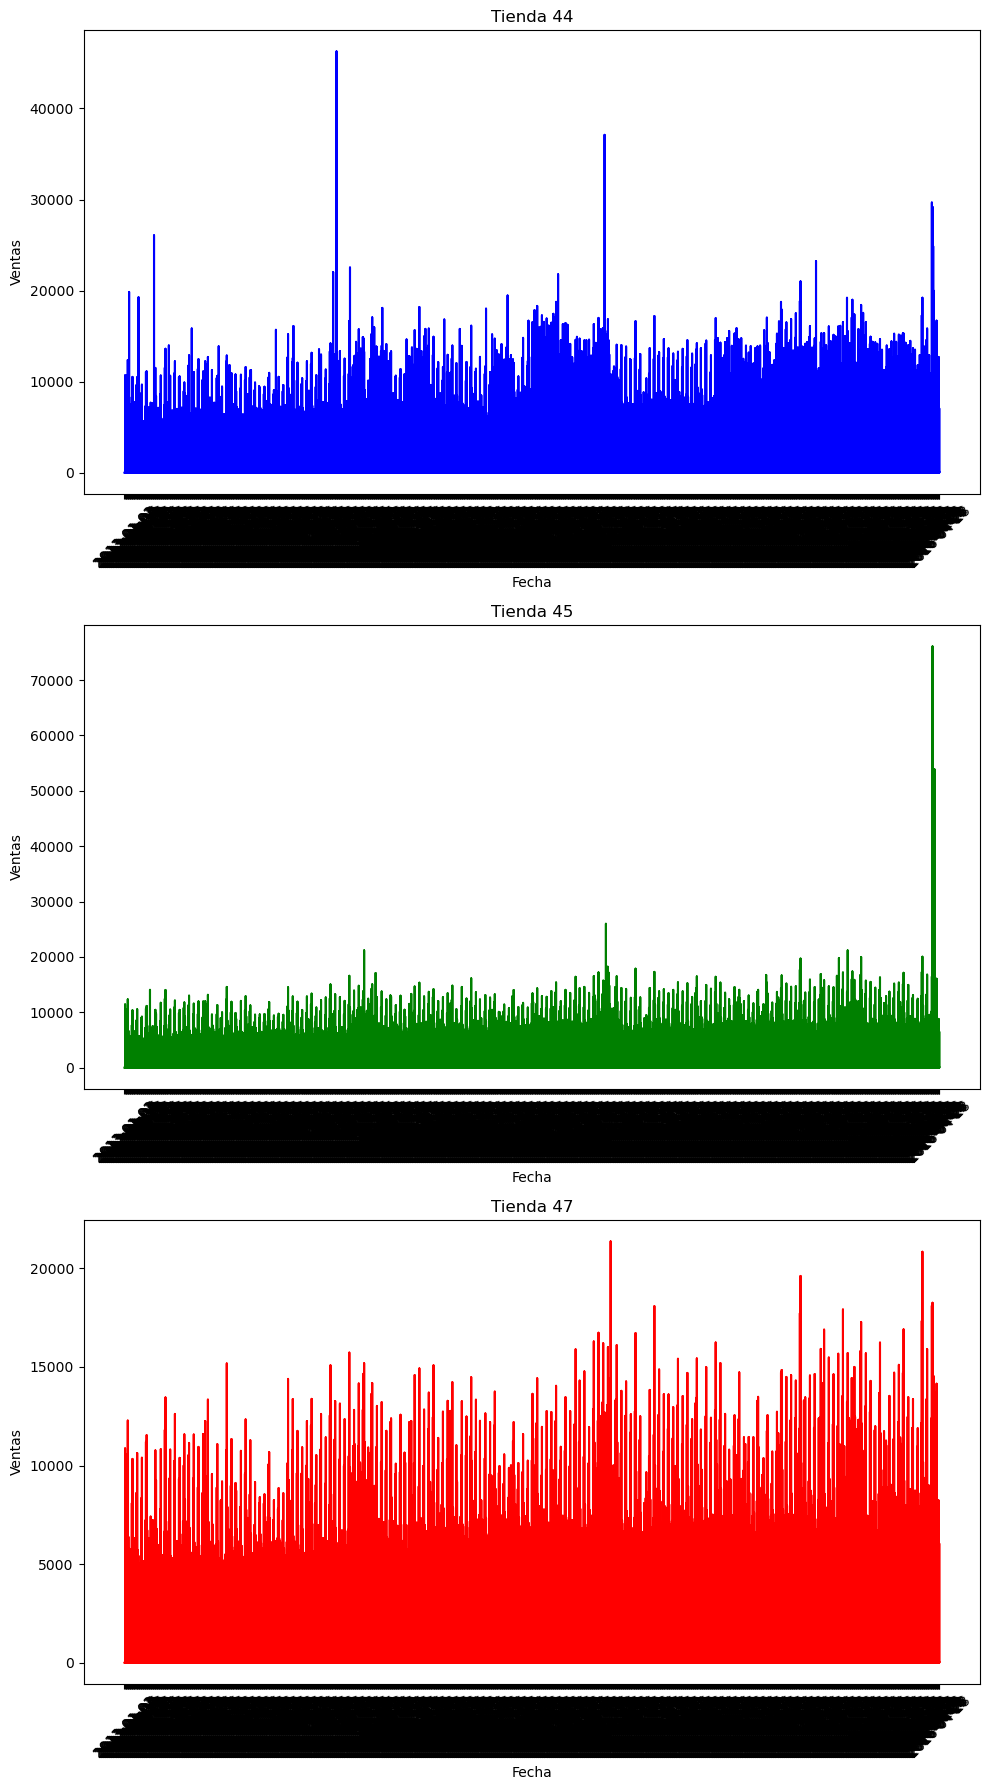

In [34]:
# Crear subplots
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

# Lista de colores para los gráficos
colors = ['blue', 'green', 'red']

# Asumiendo que df tiene una columna 'date' para el eje x y 'sales' para el eje y
for i, (store, color) in enumerate(zip(top_3_tiendas, colors)):
    store_data = df_top_3[df_top_3['store_nbr'] == store]
    axs[i].plot(store_data['date'], store_data['sales'], color=color)
    axs[i].set_title(f'Tienda {store}')
    axs[i].set_ylabel('Ventas')
    axs[i].tick_params(axis='x', rotation=45)

    # Etiqueta para el eje x de cada subplot
    axs[i].set_xlabel('Fecha')

plt.tight_layout()
plt.show()

## Segunda opción de solución - Mejorada

In [27]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0.0
4,4,2013-01-01,1,BOOKS,0.000,0.0
...,...,...,...,...,...,...
2158658,2158658,2016-04-29,27,PREPARED FOODS,111.694,1.0
2158659,2158659,2016-04-29,27,PRODUCE,2395.465,0.0
2158660,2158660,2016-04-29,27,SCHOOL AND OFFICE SUPPLIES,2.000,0.0
2158661,2158661,2016-04-29,27,SEAFOOD,27.728,5.0


In [31]:
len(df['store_nbr'].unique()) #Hay 54 tiendas

54

In [32]:
len(df['date'].unique())

1212

Al tener tantos datos, es buena idea empezar a reducirlos, reducir el scope, solo analizar las tiendas que me interesan, o analizar mes a mes en vez de día a día.

In [38]:
df['mes'] = df['date'].apply(lambda x : x[:7])
# Nueva columna que me trae el mes y el anio
df

,id,date,store_nbr,family,sales,onpromotion,mes
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013-01
1,1,2013-01-01,1,BABY CARE,0.000,0.0,2013-01
2,2,2013-01-01,1,BEAUTY,0.000,0.0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,2013-01
4,4,2013-01-01,1,BOOKS,0.000,0.0,2013-01
...,...,...,...,...,...,...,...
2158658,2158658,2016-04-29,27,PREPARED FOODS,111.694,1.0,2016-04
2158659,2158659,2016-04-29,27,PRODUCE,2395.465,0.0,2016-04
2158660,2158660,2016-04-29,27,SCHOOL AND OFFICE SUPPLIES,2.000,0.0,2016-04
2158661,2158661,2016-04-29,27,SEAFOOD,27.728,5.0,2016-04


In [41]:
len(df['mes'].unique()) #Tengo 40 meses de analisis
#He reducido mi espacio de analisis

40

In [43]:
#Quiero analizar cuales son las tiendas con mas productos vendidos
#Requiero un top n de tiendas

agrupado_tiendas = df.groupby('store_nbr').agg({ #Sacar numero de ventas de cada tienda
    'sales':'sum'
    })
agrupado_tiendas

,sales
store_nbr,
1,9.169735e+06
2,1.408323e+07
3,3.259099e+07
4,1.244171e+07
5,1.085585e+07
6,1.651690e+07
7,1.716661e+07
8,1.970458e+07
9,1.748563e+07


In [45]:
agrupado_tiendas.describe()
#Existe una tienda cuyo valor de ventas es cero, este valor outlier me puede afectar
#Los estadisticos de mis datos

,sales
count,5.400000e+01
mean,1.267030e+07
std,8.835668e+06
min,0.000000e+00
25%,7.081256e+06
50%,1.061710e+07
75%,1.621715e+07
max,4.051842e+07


<Axes: >

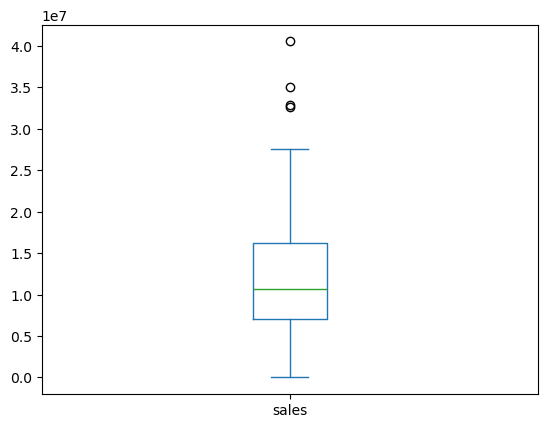

In [47]:
agrupado_tiendas.plot.box()

Las tiendas que al parecer mas han vendido son outliers en el diagrama de cajas

Por qué el valor de 0.0 que para nosotros es outlier, no es outlier para el diagrama de cajas?

Muy probablemente porque la fórmula del rango intercuartil no lo logra detectar como un valor aberrante a la distribución, dado que no es un valor relativamente tan alejado de la media en comparación con los otros de la cola de la distribución. Esto no significa que no sea outlier.Dado el contexto del análisis SI LO ES. Aquí entra nuestro criterio de investigador por encima de lo que nos muestra una visualización.

<Axes: ylabel='Frequency'>

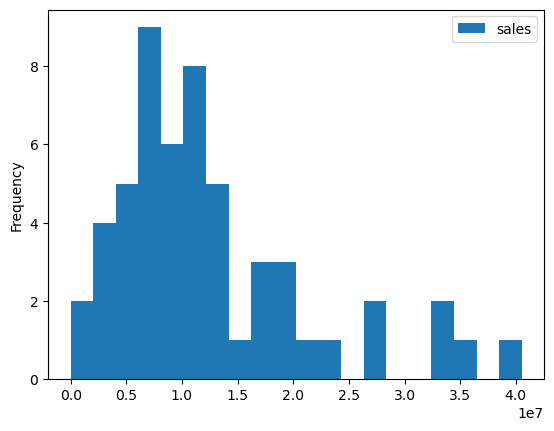

In [49]:
agrupado_tiendas.plot.hist(bins = 20)

El histograma me muestra que hay un sesgo positivo o hacia la derecha, quiere decir que los bins hacia la derecha son las tiendas con más ventas historicamente, que se relacionan con los outliers del diagrama de cajas. Analizemos cuales son estas tiendas.

In [50]:
agrupado_tiendas.sort_values('sales', ascending = False)

,sales
store_nbr,
44,4.051842e+07
45,3.501985e+07
47,3.284101e+07
3,3.259099e+07
46,2.759175e+07
49,2.637830e+07
48,2.386429e+07
51,2.174485e+07
8,1.970458e+07


Las tiendas que mas han vendido son las tiendas 44, 45, 3 y 46

In [55]:
top_5_tiendas = [44,45,47,3,46]

In [57]:
df_top_5 = df[df['store_nbr'].isin(top_5_tiendas)]
df_top_5

,id,date,store_nbr,family,sales,onpromotion,mes
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0.0,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0.0,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0.0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0.0,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0.0,2013-01
...,...,...,...,...,...,...,...
2157601,2157601,2016-04-28,47,POULTRY,628.328,1.0,2016-04
2157602,2157602,2016-04-28,47,PREPARED FOODS,191.124,0.0,2016-04
2157603,2157603,2016-04-28,47,PRODUCE,3653.998,1.0,2016-04
2157604,2157604,2016-04-28,47,SCHOOL AND OFFICE SUPPLIES,4.000,0.0,2016-04


Hemos reducido el scope del analisis reduciendo los datos en fecha por mes-año y en tiendas con mas ventas.

In [62]:
top_5_por_mes = df_top_5.groupby(['store_nbr','mes']).agg({
    'sales' : 'sum'
})
top_5_por_mes

sales
store_nbr mes                  
3         2013-01  4.965743e+05
          2013-02  4.296186e+05
          2013-03  5.316862e+05
          2013-04  5.120721e+05
          2013-05  5.181973e+05
...                         ...
47        2015-12  1.264874e+06
          2016-01  1.154481e+06
          2016-02  1.028481e+06
          2016-03  1.078566e+06
          2016-04  1.077038e+06

[200 rows x 1 columns]

El df top_5_por_mes tiene las ventas por mes de cada una de las 5 tiendas top

In [64]:
top_5_por_mes = top_5_por_mes.reset_index()
top_5_por_mes

,index,store_nbr,mes,sales
0,0,3,2013-01,4.965743e+05
1,1,3,2013-02,4.296186e+05
2,2,3,2013-03,5.316862e+05
3,3,3,2013-04,5.120721e+05
4,4,3,2013-05,5.181973e+05
...,...,...,...,...
195,195,47,2015-12,1.264874e+06
196,196,47,2016-01,1.154481e+06
197,197,47,2016-02,1.028481e+06
198,198,47,2016-03,1.078566e+06


C:\Users\jeron\anaconda32024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jeron\anaconda32024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



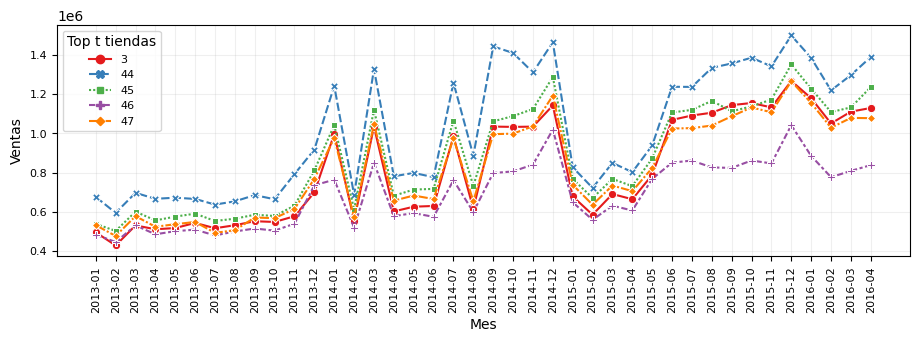

In [87]:
#Usando seaborn

ax = sns.lineplot(
    data = top_5_por_mes, #Datos a graficar
    x = 'mes',
    y = 'sales',
    hue = 'store_nbr', #hue por cada categoria arma una linea diferente con color diferente
    style = 'store_nbr',
    markers = True,
    palette = 'Set1'
)

ax.tick_params(
    axis = 'x',
    labelrotation = 90,
    labelsize = 8     
)

ax.tick_params(
    axis = 'y',
    labelsize = 8     
)

ax.grid(
    visible = True,
    axis = 'x',
    alpha = 0.2
)

ax.grid(
    visible = True,
    axis = 'y',
    alpha = 0.2
)

ax.legend(
    title = 'Top t tiendas',
    fontsize = 8
)

ax.set_ylabel('Ventas')
ax.set_xlabel('Mes')

fig = ax.get_figure()
fig.set_size_inches(11,3)

In [89]:
top_5_tiendas

[44, 45, 47, 3, 46]

In [102]:
#Graficacion iterativa
estilos_por_tienda = {
    #Color, opacidad, marker, linea, ancho
    44: ['grey', 0.4, '+', '--', 1],
    45: ['grey', 0.4, 's', '--', 1],
    47: ['grey', 0.4, 'x', '--', 1],
    3:  ['red', 1.0, 'o', '-', 1.5],
    46: ['grey', 0.4, 'D', '--', 1]
}

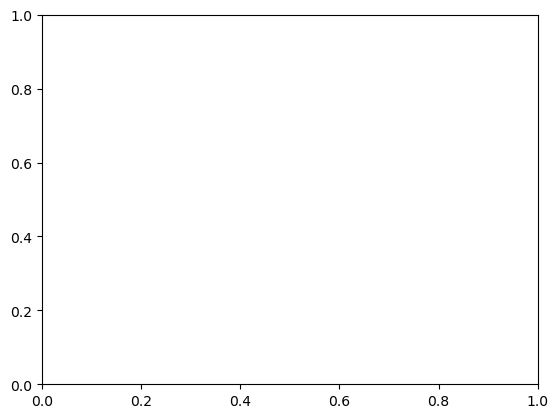

In [93]:
fig2, ax2 = plt.subplots()

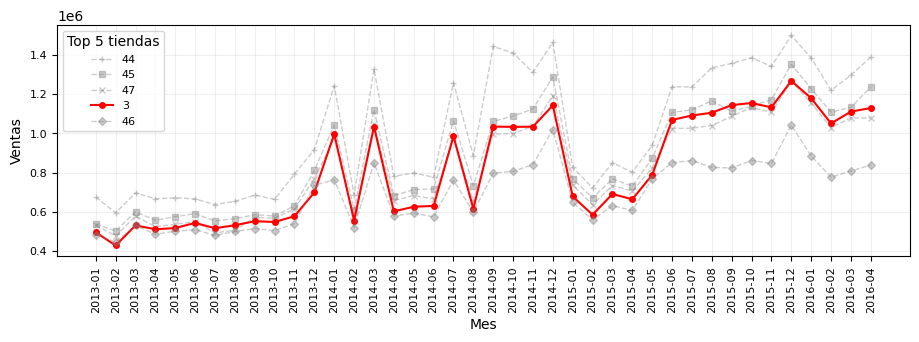

In [103]:
fig2, ax2 = plt.subplots()
for tienda in top_5_tiendas:
    estilos = estilos_por_tienda[tienda]
    df_temp = top_5_por_mes[top_5_por_mes['store_nbr'] == tienda]

    ax2.plot(
        df_temp['mes'], #Datos
        df_temp['sales'], #eje y 
        label = tienda,
        markersize = 4,
        color = estilos[0],
        alpha = estilos[1],
        marker = estilos[2],
        linestyle = estilos[3],
        linewidth = estilos[4]
        
    )

ax2.tick_params(
    axis = 'x',
    labelrotation = 90,
    labelsize = 8     
)

ax2.tick_params(
    axis = 'y',
    labelsize = 8     
)

ax2.grid(
    visible = True,
    axis = 'x',
    alpha = 0.2
)

ax2.grid(
    visible = True,
    axis = 'y',
    alpha = 0.2
)

ax2.legend(
    title = 'Top 5 tiendas',
    fontsize = 8
)

ax2.set_ylabel('Ventas')
ax2.set_xlabel('Mes')

fig2.set_size_inches(11,3)

Este gráfico muestra como han evolucionado las ventas historicamente del top 5 de tiendas con más ventas, se ha hecho énfasis en la tienda número 3 para recalcar su crecimiento respecto a las demás y analizar especificamente, este mismo proceso se puede hacer para cada tienda